# Business Strategy for Consumer Loans Predictive Model

## Executive Summary

In order to achieve the goal of predicting whether granting credit to individuals will result in a profit, we propose the development and implementation of a robust predictive model using the [Consumer Loans dataset](https://www.kaggle.com/datasets/zafish/consumer-loans?select=orig_test.csv). This model will be instrumental in aiding financial institutions to make informed decisions regarding loan approvals, mitigating risks, and maximizing profitability.

## Key Steps and Strategies

### 1. Data Preprocessing and Exploration

- **Data Cleaning**: Thoroughly clean the dataset by handling missing values, outliers, and ensuring data consistency. This step is crucial for the model's accuracy.
  
- **Exploratory Data Analysis (EDA)**: Conduct a comprehensive EDA to gain insights into the data distribution, relationships between variables, and identify potential patterns.

### 2. Feature Engineering

- **Create Relevant Features**: Derive new features that might enhance the predictive power of the model. 

### 3. Model Selection and Training

- **Model Selection**: Choose appropriate machine learning algorithms for classification tasks, considering the nature of the data. Common choices include Random Forest, Gradient Boosting, and Logistic Regression (TBD).

- **Hyperparameter Tuning**: Optimize the model's performance by fine-tuning hyperparameters through techniques such as grid search or random search .

- **Cross-Validation**: Implement cross-validation to assess the model's generalization performance and reduce overfitting.


## Business case
After below's exploration, we will be using the predictive model to predict whether a loan is approved or not - boolean value indicated by **FINALIZED_LOAN** column. As the name suggest, the dataset represents consumers with some features they'll need to provide to bank form to apply for a loan. However, it is time-consuming process that in some cases will require financial effort and for one it might require long travel and taking off days at job. Here comes our model, which will be able to predict the probability of a loan being approved or not - for some it might save time, thus model indicating low possibility of a loan being approved might save them pointless effort.

We are going to get rid of the column **DEFAULT_FLAG** as we assume that this feature comes after having finalized a loan, so we cannot base our predictions on features from the future.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

df = pd.read_csv("../data/orig_train.csv")

In [3]:
df.drop(["DEFAULT_FLAG"], axis=1, inplace=True)

# Basic Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [5]:
SHOW_ROWS = 4
columns = ["dtype", "missing"] + [f"example_row_{i + 1}" for i in range(SHOW_ROWS)]

pd.DataFrame(np.c_[df.dtypes, pd.isna(df).sum(), df.head(SHOW_ROWS).T], index=df.columns, columns=columns)

,dtype,missing,example_row_1,example_row_2,example_row_3,example_row_4
PRODUCT,object,0,C,C,F,C
AGE,int64,0,65,64,30,39
AREA,object,0,County capital,County capital,Urban area,County capital
RESIDENTIAL_PLACE,object,0,Owner without mortgage,Owner without mortgage,Living with family,Owner without mortgage
EDUCATION,object,0,University,University,University,Post-graduate
MARITAL_STATUS,object,0,married,married,married,divorced
HOUSEHOLD_MEMBERS,int64,0,2,2,2,1
NO_OF_DEPENDENTS,int64,0,0,0,0,0
INCOME,float64,0,1245.0,1380.0,1131.0,1730.0
WORK_SENIORITY,int64,0,5,5,2,9


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15097.0,43.584553,13.460964,19.0,32.00,42.000,56.0,74.0
HOUSEHOLD_MEMBERS,15097.0,1.717229,0.759843,1.0,1.00,2.000,2.0,5.0
NO_OF_DEPENDENTS,15097.0,0.199510,0.493135,0.0,0.00,0.000,0.0,4.0
INCOME,15097.0,1958.071916,1772.153274,0.0,1007.42,1426.495,2290.0,40621.6
WORK_SENIORITY,15097.0,6.647347,5.647763,1.0,3.00,5.000,8.0,46.0
BUSINESS AGE,15097.0,17.938001,12.477914,1.0,12.00,16.000,21.0,116.0
LENGTH_RELATIONSHIP_WITH_CLIENT,15097.0,4.996556,4.900952,1.0,1.00,2.000,10.0,110.0
DEBIT_CARD,15097.0,0.384116,0.486402,0.0,0.00,0.000,1.0,1.0
CURRENT_ACCOUNT,15097.0,0.485461,0.499805,0.0,0.00,0.000,1.0,1.0
SAVING_ACCOUNT,15097.0,0.000397,0.019932,0.0,0.00,0.000,0.0,1.0


We can see that the format of BUSINESS AGE doesn't match the rest of the names. Let's change it.

In [7]:
df = df.rename(columns={'BUSINESS AGE':'BUSINESS_AGE'})

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15097.0,43.584553,13.460964,19.0,32.00,42.000,56.0,74.0
HOUSEHOLD_MEMBERS,15097.0,1.717229,0.759843,1.0,1.00,2.000,2.0,5.0
NO_OF_DEPENDENTS,15097.0,0.199510,0.493135,0.0,0.00,0.000,0.0,4.0
INCOME,15097.0,1958.071916,1772.153274,0.0,1007.42,1426.495,2290.0,40621.6
WORK_SENIORITY,15097.0,6.647347,5.647763,1.0,3.00,5.000,8.0,46.0
BUSINESS_AGE,15097.0,17.938001,12.477914,1.0,12.00,16.000,21.0,116.0
LENGTH_RELATIONSHIP_WITH_CLIENT,15097.0,4.996556,4.900952,1.0,1.00,2.000,10.0,110.0
DEBIT_CARD,15097.0,0.384116,0.486402,0.0,0.00,0.000,1.0,1.0
CURRENT_ACCOUNT,15097.0,0.485461,0.499805,0.0,0.00,0.000,1.0,1.0
SAVING_ACCOUNT,15097.0,0.000397,0.019932,0.0,0.00,0.000,0.0,1.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
PRODUCT,15097,6,C,6779
AREA,15097,4,County capital,7586
RESIDENTIAL_PLACE,15097,5,Owner without mortgage,8457
EDUCATION,15097,10,University,5457
MARITAL_STATUS,15097,4,married,8141
ECONOMIC_SECTOR,15097,18,Missing,4009
EMPLOYEE_NO,15097,9,Missing,3338


From below list we can clearly say that **Missing** is a key word to indicate missing values in a dataset for categorical variables.

In [10]:
CATEGORICAL = list(df.select_dtypes(include="object").columns)

def print_categorical_distribution(cols):
    print(f"{'COLUMN NAME':20s}{'CAT NUM':10s}CATEGORIES")
    for col in cols:
        print(f"{col:20s}{len(df[col].unique()):<10}{', '.join([f'{name}({count})' for name, count in df[col].value_counts().items()])}")
        
print_categorical_distribution(CATEGORICAL)

COLUMN NAME         CAT NUM   CATEGORIES
PRODUCT             6         C(6779), B(3407), F(3334), E(1522), A(42), D(13)
AREA                4         County capital(7586), Rural area(4192), Urban area(3286), Missing(33)
RESIDENTIAL_PLACE   5         Owner without mortgage(8457), Living with family(5505), Owner with mortgage(861), Other(246), Rental(28)
EDUCATION           10        University(5457), Highschool(3451), Post secondary school(1620), Vocational school(1228), Post-graduate(1046), Other(819), Missing(691), College(562), Middle school(195), Primary school(28)
MARITAL_STATUS      4         married(8141), single(5113), divorced(1045), widow(798)
ECONOMIC_SECTOR     18        Missing(4009), Manufacturing(3093), Wholesale and retail trade(1413), Public administration and defence(1257), Other(840), Transportation and storage(691), Human health and social work activities(668), Information and communication(517), Education(460), Professional, scientific and technical activities(393),

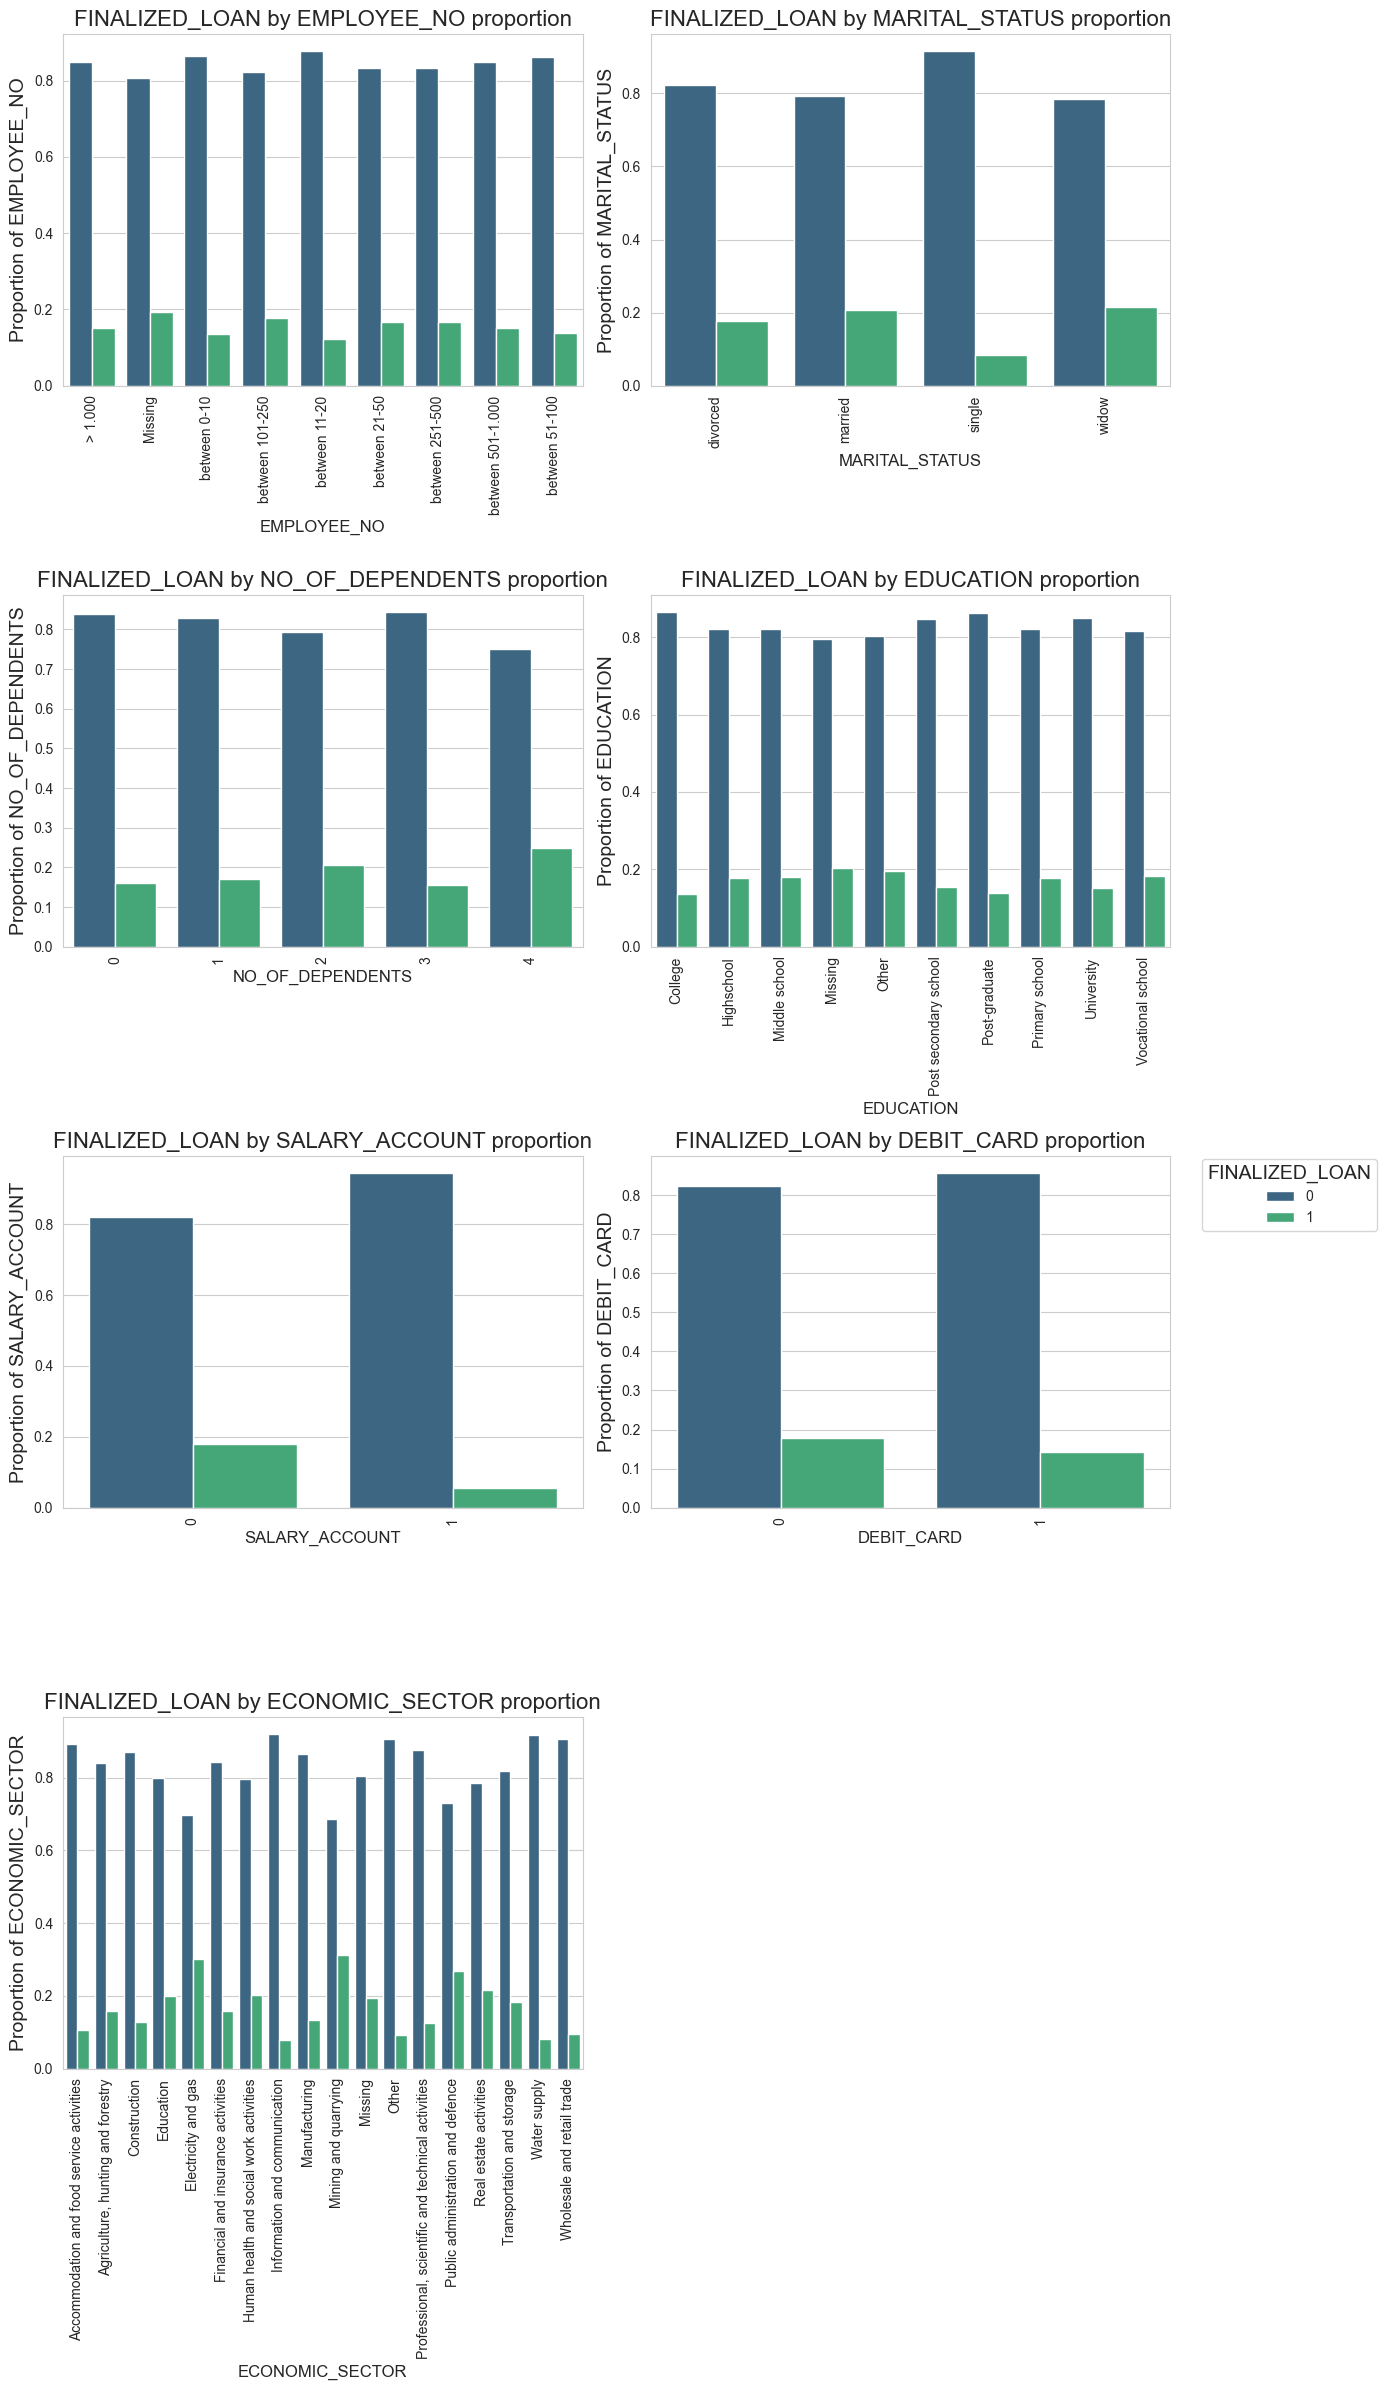

In [11]:
def plot_cross_tab(*names):
    rows = int(np.ceil(len(names) / 2))
    cols = 2 
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 6 * rows))
    axes = axes.flatten()
    
    legend_handles = []
    legend_labels = []
    for i, name in enumerate(names):
        data = pd.crosstab(df[name], df['FINALIZED_LOAN'])
        data = data.div(data.sum(1).astype(float), axis=0)
        data = data.reset_index()
        data = pd.melt(data, id_vars=[name], var_name='FINALIZED_LOAN', value_name='FREQUENCY')
        
        sns.barplot(data=data, x=name, y="FREQUENCY", hue="FINALIZED_LOAN", palette="viridis", ax=axes[i])
        axes[i].set_title(f"FINALIZED_LOAN by {name} proportion", fontsize=16)
        axes[i].set_xlabel(f"{name}", fontsize=12)
        axes[i].set_ylabel(f"Proportion of {name}", fontsize=14)
        axes[i].tick_params(axis='x', rotation=90)
        
        if i == 0:
            handles, labels = axes[i].get_legend_handles_labels()
            legend_handles.extend(handles)
            legend_labels.extend(labels)
        axes[i].get_legend().remove()
            
    fig.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='FINALIZED_LOAN', title_fontsize='14')
    plt.tight_layout()
    
    for i in range(rows * cols, len(names), -1):
        axes[i - 1].axis('off')
    plt.show()

plot_cross_tab("EMPLOYEE_NO", "MARITAL_STATUS", "NO_OF_DEPENDENTS", "EDUCATION", "SALARY_ACCOUNT", "DEBIT_CARD", "ECONOMIC_SECTOR")

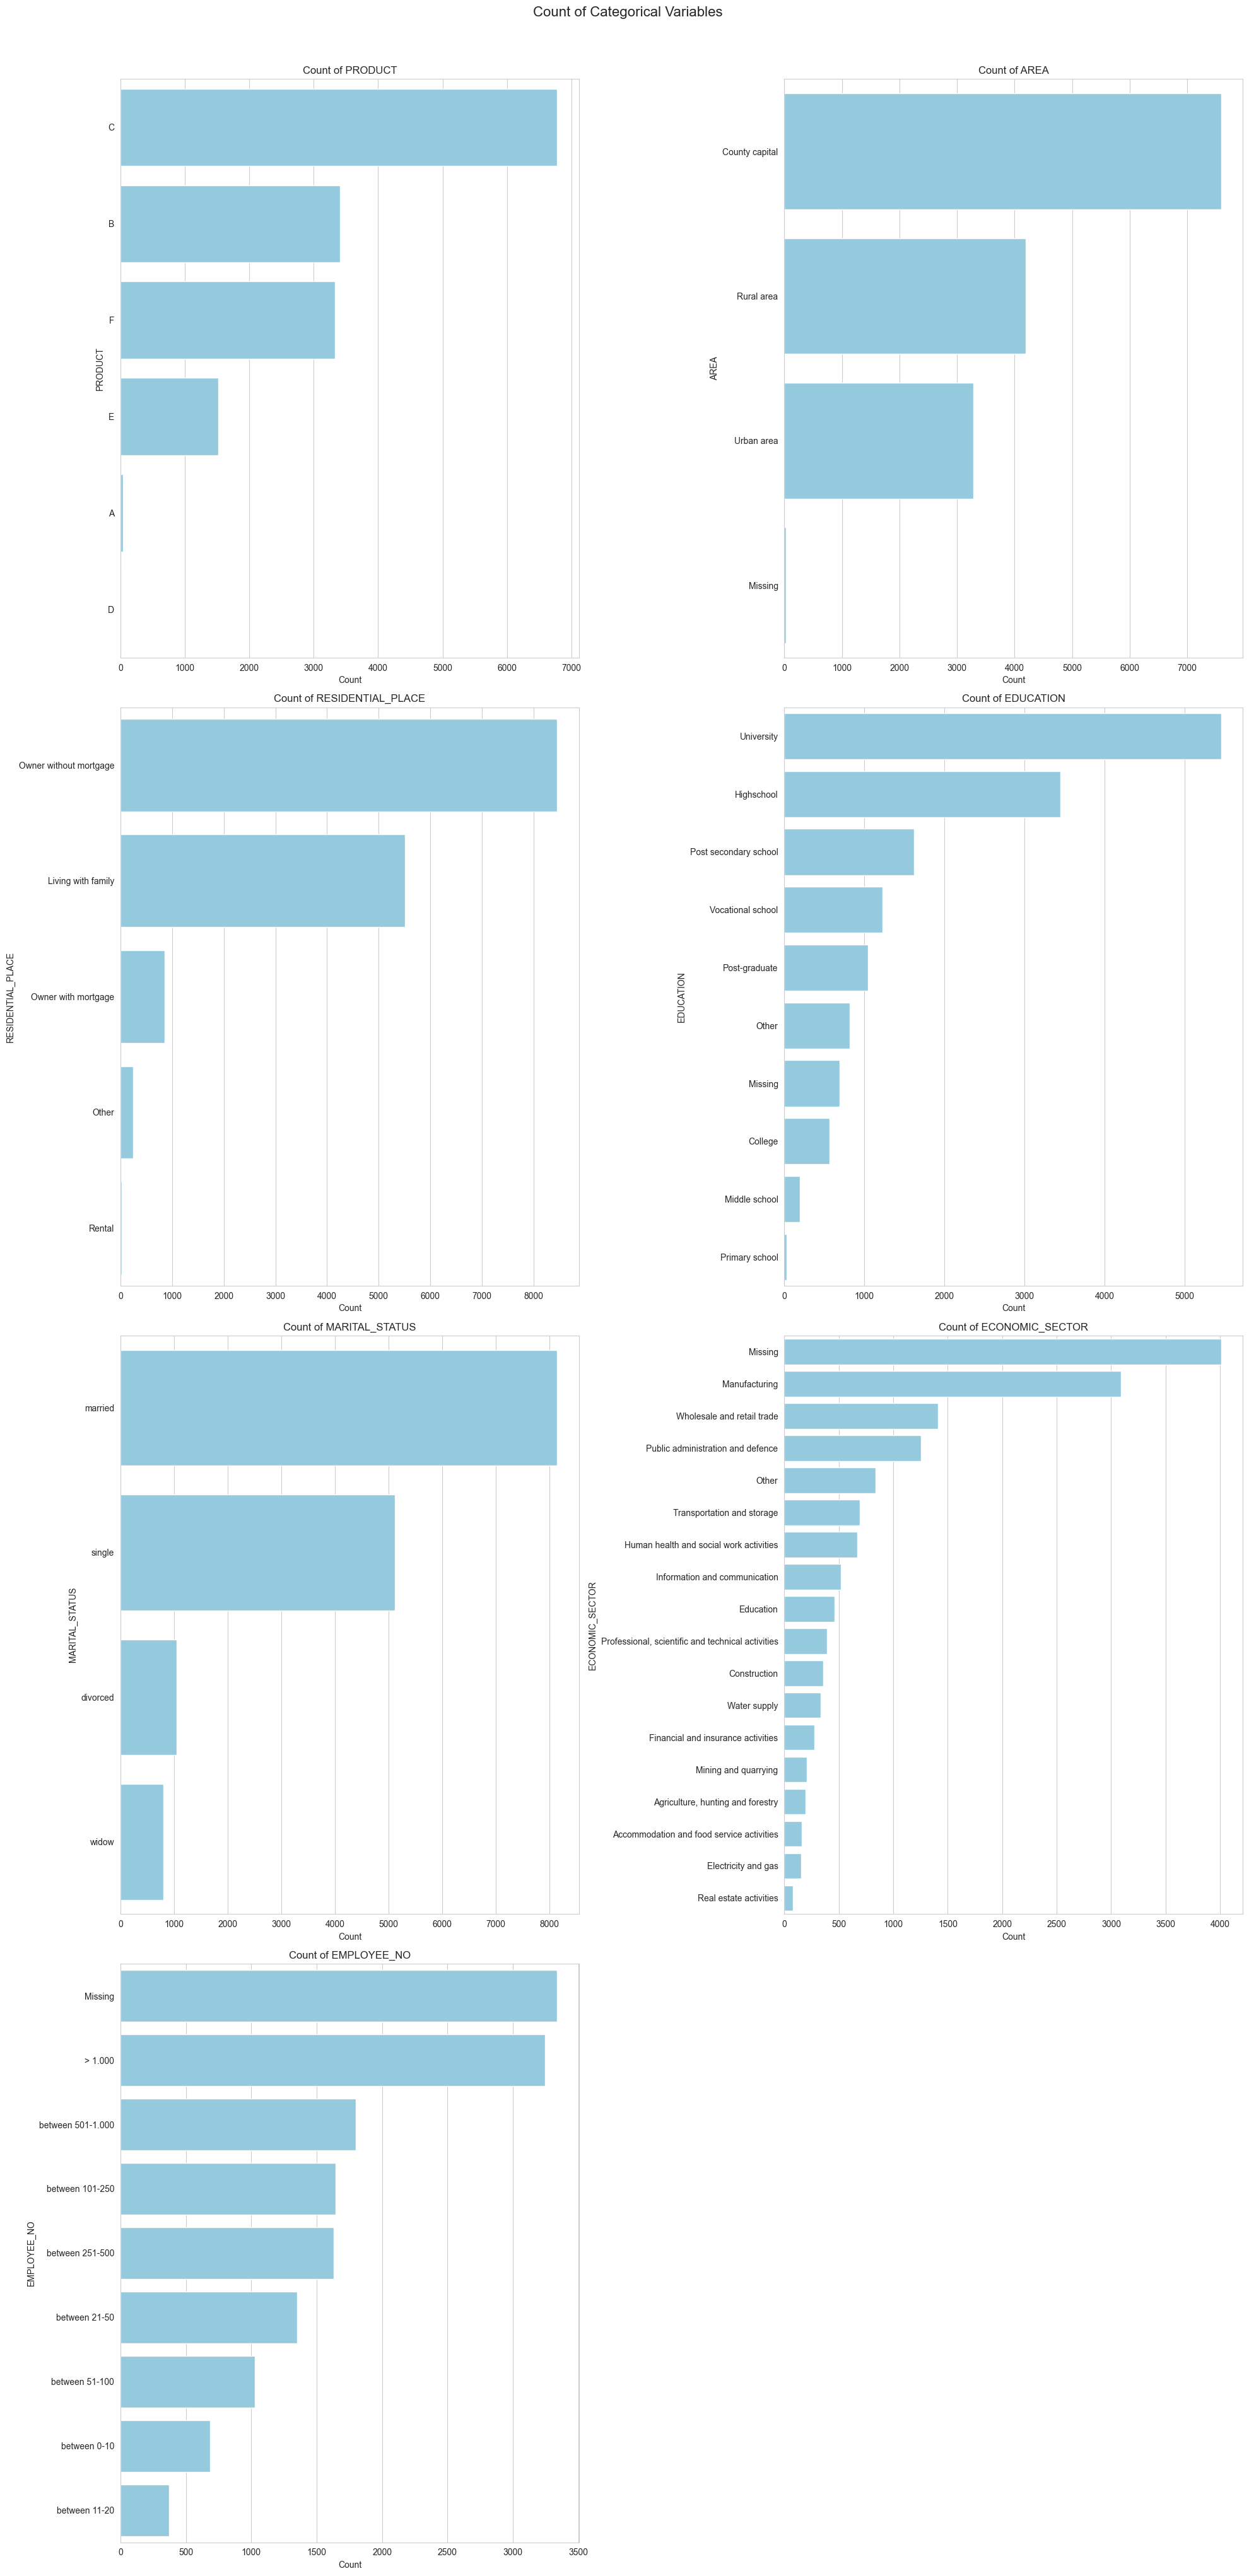

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 40))
axes = axes.flatten()
for i, col in enumerate(CATEGORICAL):
    if i < len(CATEGORICAL):
        sns.countplot(data=df, y=col, color="skyblue", ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(f"Count of {col}")
        axes[i].set_xlabel("Count")
        axes[i].set_ylabel(col)

    else:
        
        fig.delaxes(axes[i])
plt.tight_layout()
plt.suptitle("Count of Categorical Variables", fontsize=16, y=1.02)
axes[-1].axis('off')
plt.show()

**Insights:**
* Here we can see that the amout of products in A and D category is proportionally low in contrast to the rest.
* In count we have little missing data. Most of the loan takers are from County Capital
* Low amount of rental residential place.
* Most have graduated from university.
* High ratio of married people
* Many missing values in Economic sector
* Same we can say about missing values in emplyee number

In [13]:
print(f"{'COLUMN NAME':20s}{'MISSING NUM':15s}MISSING %")
MISSING_CATEGORICAL = []
for col in CATEGORICAL:
    missing = np.sum(df[col] == 'Missing')
    print(f"{col:20s}{missing:<15}{missing/len(df):.2f}")
    
    if missing > 0:
        MISSING_CATEGORICAL.append(col)

COLUMN NAME         MISSING NUM    MISSING %
PRODUCT             0              0.00
AREA                33             0.00
RESIDENTIAL_PLACE   0              0.00
EDUCATION           691            0.05
MARITAL_STATUS      0              0.00
ECONOMIC_SECTOR     4009           0.27
EMPLOYEE_NO         3338           0.22


# Understanding Data Distribution

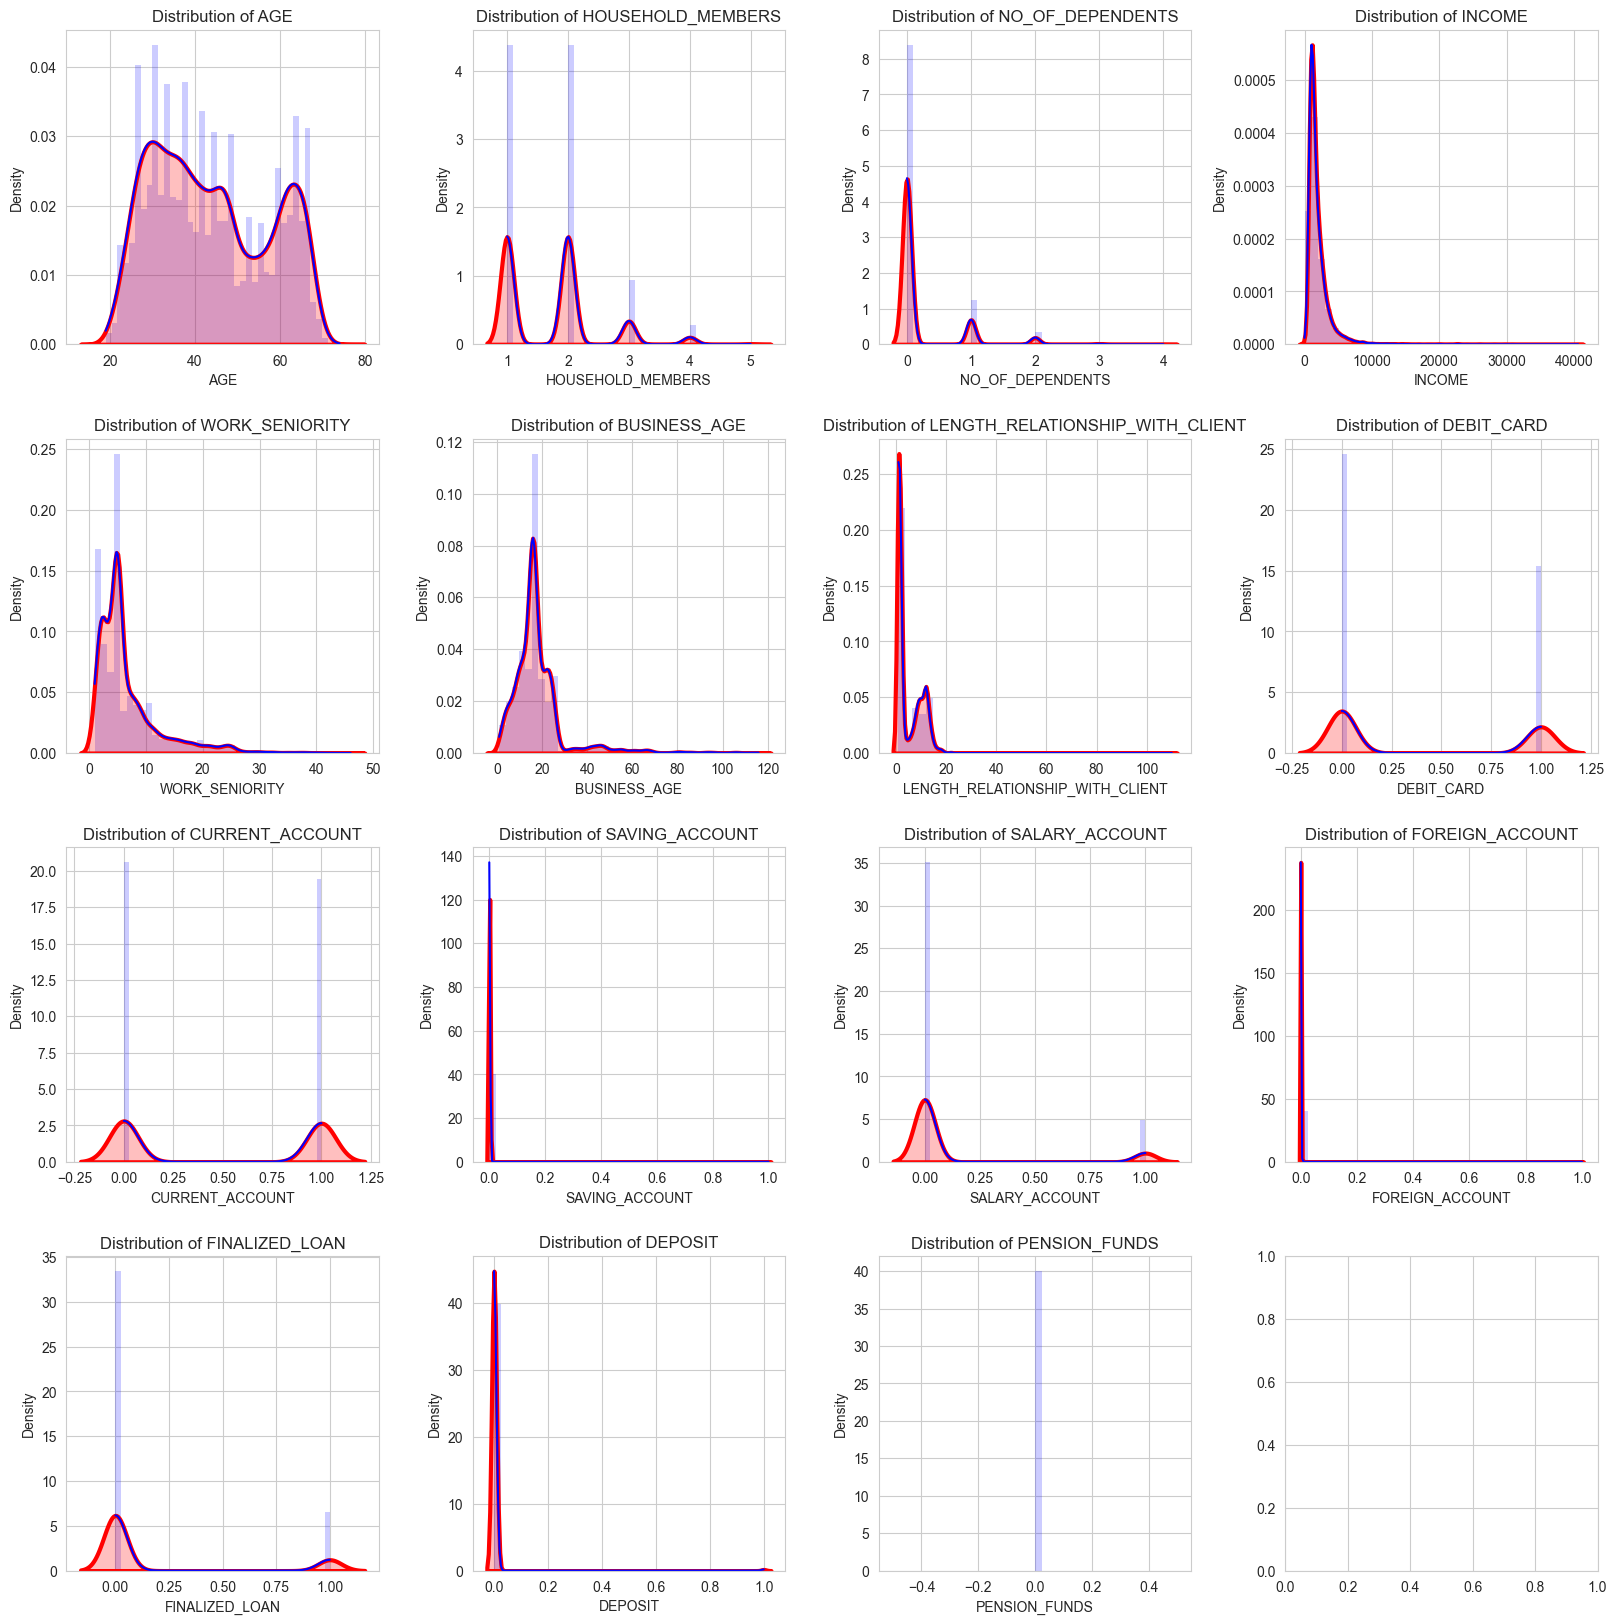

In [14]:
import math

NUMERICAL = list(df.select_dtypes(include="number").columns)
COLS = 4
ROWS = math.ceil(len(NUMERICAL) / COLS)

fig, axes = plt.subplots(ROWS, COLS, figsize=(ROWS * 4, COLS * 4))
axes = axes.flatten()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, col_name in enumerate(NUMERICAL):
    sns.histplot(df[col_name], kde=True, color='blue', stat='density', ax=axes[i], bins=40, alpha=0.2, linewidth=0)
    sns.kdeplot(df[col_name], color='red', linewidth=3, fill=True, ax=axes[i], warn_singular=False)
    
    axes[i].set_title(f"Distribution of {col_name}")
    
plt.show()

Pension funds is useless we can drop it

In [15]:
print(np.unique(df["PENSION_FUNDS"]))
df.drop(["PENSION_FUNDS"], axis=1, inplace=True)
NUMERICAL.remove("PENSION_FUNDS")

[0]


Based on above plots and variables names we can assume that below variables are in fact boolean not numeric

In [16]:
BOOLEAN = [
    "DEBIT_CARD", "CURRENT_ACCOUNT", "SAVING_ACCOUNT", "SALARY_ACCOUNT", "FOREIGN_ACCOUNT", "FINALIZED_LOAN", "DEPOSIT"
]

print_categorical_distribution(BOOLEAN)

COLUMN NAME         CAT NUM   CATEGORIES
DEBIT_CARD          2         0(9298), 1(5799)
CURRENT_ACCOUNT     2         0(7768), 1(7329)
SAVING_ACCOUNT      2         0(15091), 1(6)
SALARY_ACCOUNT      2         0(13237), 1(1860)
FOREIGN_ACCOUNT     2         0(15095), 1(2)
FINALIZED_LOAN      2         0(12618), 1(2479)
DEPOSIT             2         0(15041), 1(56)


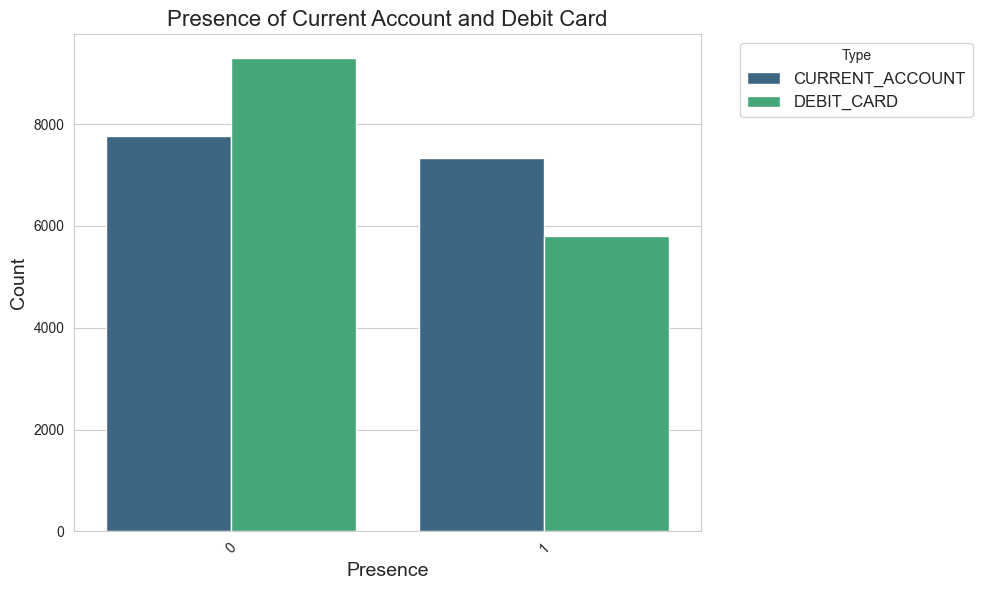

In [17]:
df_long = df.melt(value_vars=['CURRENT_ACCOUNT', 'DEBIT_CARD'])

# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_long, x='value', hue='variable', palette='viridis')
plt.title('Presence of Current Account and Debit Card', fontsize=16)
plt.xlabel('Presence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Type', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
def make_bool_dist_matrix(name_1, name_2):
    return pd.DataFrame([
        [
            f"{len(df.iloc[np.where((df[name_1] == i) & (df[name_2] == j))]) * 100 / len(df):.3f}% ({len(df.iloc[np.where((df[name_1] == i) & (df[name_2] == j))])})"
            for i in range(2)
        ]
        for j in range(2)
    ], columns=[f"{name_1}_0", f"{name_1}_1"], index=[[f"{name_2}_0", f"{name_2}_1"]])
    
make_bool_dist_matrix("CURRENT_ACCOUNT", "FINALIZED_LOAN")

,CURRENT_ACCOUNT_0,CURRENT_ACCOUNT_1
FINALIZED_LOAN_0,42.803% (6462),40.776% (6156)
FINALIZED_LOAN_1,8.651% (1306),7.770% (1173)


In [19]:
pd.DataFrame([
    [
        f"{len(df.iloc[np.where((df['DEBIT_CARD'] == i) & (df['FINALIZED_LOAN'] == j))]) * 100 / len(df):.3f}% ({len(df.iloc[np.where((df['DEBIT_CARD'] == i) & (df['FINALIZED_LOAN'] == j))])})"
        for i in range(2)
    ]
    for j in range(2)
], columns=["DEBIT_CARD_0", "DEBIT_CARD_1"], index=[["FINALIZED_LOAN_0", "FINALIZED_LOAN_1"]])

,DEBIT_CARD_0,DEBIT_CARD_1
FINALIZED_LOAN_0,50.666% (7649),32.914% (4969)
FINALIZED_LOAN_1,10.923% (1649),5.498% (830)


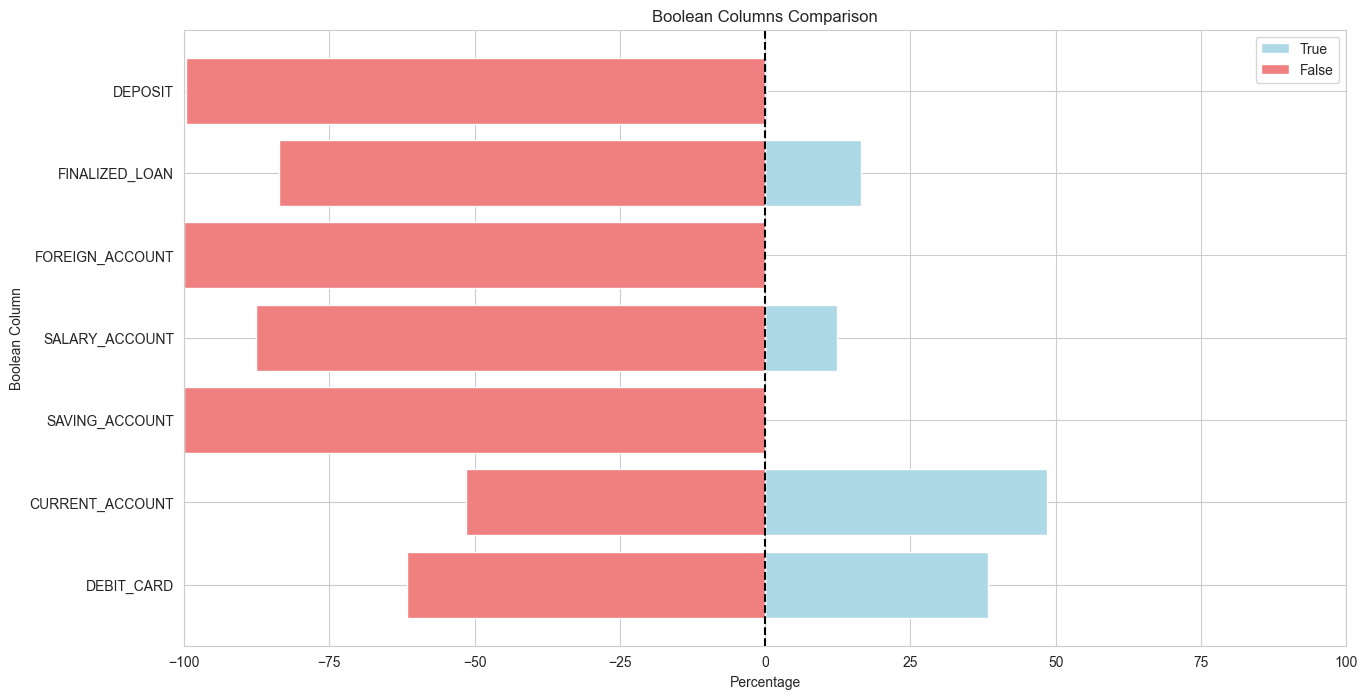

In [20]:

bool_percentages = df[BOOLEAN].apply(lambda x: x.value_counts(normalize=True) * 100).T

plt.figure(figsize=(15, 8))
legend_added = False  
for col in BOOLEAN:
    plt.barh(col, bool_percentages.loc[col, 1], color='lightblue',  label='True' if not legend_added else '' )
    plt.barh(col, -bool_percentages.loc[col, 0], color='lightcoral', label='False' if not legend_added else '')
    if not legend_added:
        legend_added = True
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Percentage')
plt.ylabel('Boolean Column')
plt.title('Boolean Columns Comparison')
plt.xlim(-100, 100)
plt.legend(loc='upper right')
plt.show()

Some of above are almost always 0 so we'll drop them to decrease the number of columns. It's also worth pointing out, that FINALIZED_LOAN column that we'll try to predict is strongly unbalanced, having nearly 80% of entries true.

In [21]:
TO_DROP = ["SAVING_ACCOUNT", "FOREIGN_ACCOUNT", "DEPOSIT", "DEBIT_CARD"]
BOOLEAN = [col for col in BOOLEAN if col not in TO_DROP]
NUMERICAL = [col for col in NUMERICAL if col not in TO_DROP]
df.drop(TO_DROP, axis=1, inplace=True)

In [22]:
CATEGORICAL.extend(BOOLEAN)
NUMERICAL = [col for col in NUMERICAL if col not in BOOLEAN]

for col in BOOLEAN:
    df[col] = df[col].astype(bool)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS_AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

Now let's check numerical data distribution once again

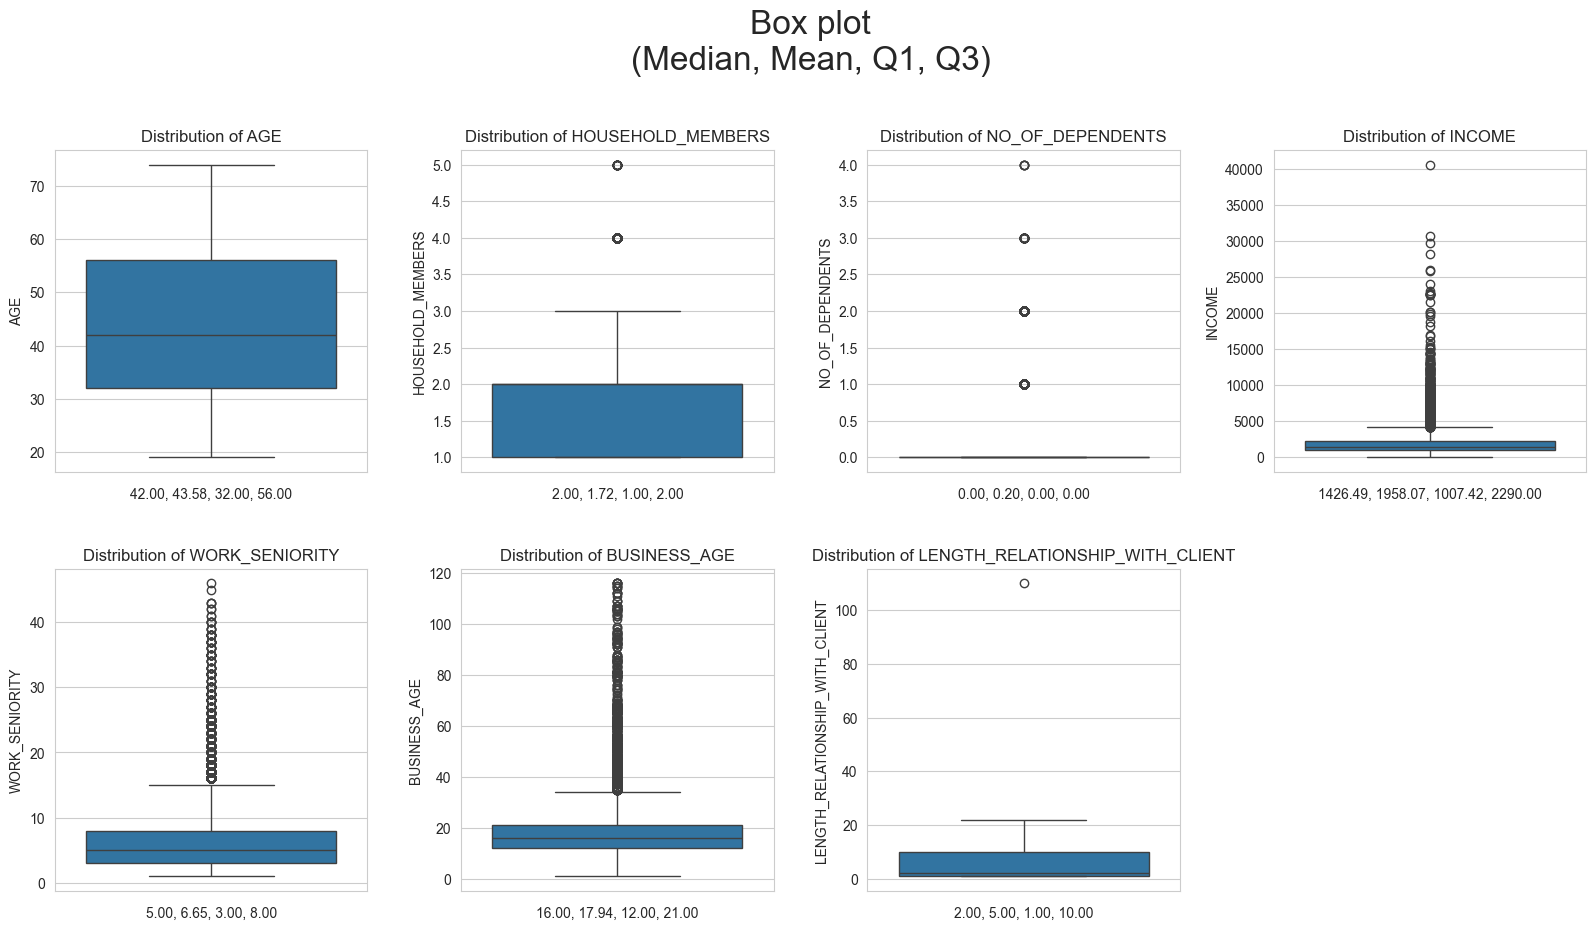

In [24]:
COLS = 4
ROWS = math.ceil(len(NUMERICAL) / COLS)

fig, axes = plt.subplots(ROWS, COLS, figsize=(ROWS * 8, COLS * 2))
axes = axes.flatten()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Box plot\n(Median, Mean, Q1, Q3)", fontsize=24, y=1.15)

for i, col_name in enumerate(NUMERICAL):
    sns.boxplot(df[col_name], ax=axes[i])
    axes[i].set_title(f"Distribution of {col_name}")
    axes[i].set_xlabel(", ".join([f"{val:.2f}" for val in [np.median(df[col_name]), np.mean(df[col_name]), np.percentile(df[col_name], 25), np.percentile(df[col_name], 75)]]))
    
axes[-1].axis('off')
plt.show()

NO_OF_DEPENDENTS has all no-zero values considered as outliers, we'll convert it to boolean column HAS_DEPENDENTS

In [25]:
df["NO_OF_DEPENDENTS"].value_counts()

NO_OF_DEPENDENTS
0    12671
1     1880
2      510
3       32
4        4
Name: count, dtype: int64

In [26]:
df["HAS_DEPENDENTS"] = df["NO_OF_DEPENDENTS"].apply(lambda x: False if x == 0 else True)
NUMERICAL.remove("NO_OF_DEPENDENTS")
df.drop("NO_OF_DEPENDENTS", axis=1, inplace=True)

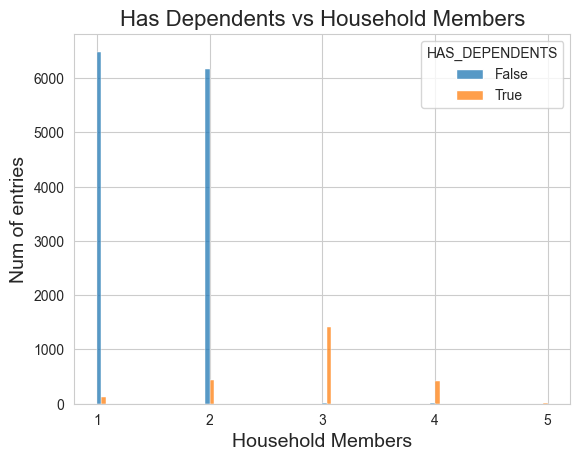

In [27]:
sns.histplot(hue="HAS_DEPENDENTS", x="HOUSEHOLD_MEMBERS", data=df, multiple="dodge")

plt.title('Has Dependents vs Household Members', fontsize=16)
plt.xlabel('Household Members', fontsize=14)
plt.ylabel('Num of entries', fontsize=14)
plt.xticks(range(1, 6))

plt.show()

Now let's see if there is a pattern between age and marital status

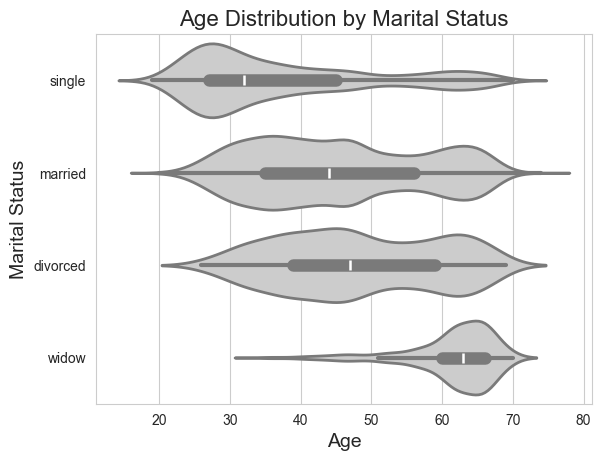

In [28]:
median_order = df.groupby("MARITAL_STATUS")["AGE"].median().sort_values().index
sns.violinplot(x="AGE", y = "MARITAL_STATUS", data=df, order=median_order, linewidth=2, legend=False, palette=sns.color_palette("blend:#CCCC,#CCCC"))

plt.title('Age Distribution by Marital Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Marital Status', fontsize=14)

plt.show()

We can see that there is a visible correlation between Age and marital status.
* Young people are mostly single
* Middle aged are mostly marries and divorced
* The elderly are mostly widowed


What about education and income?

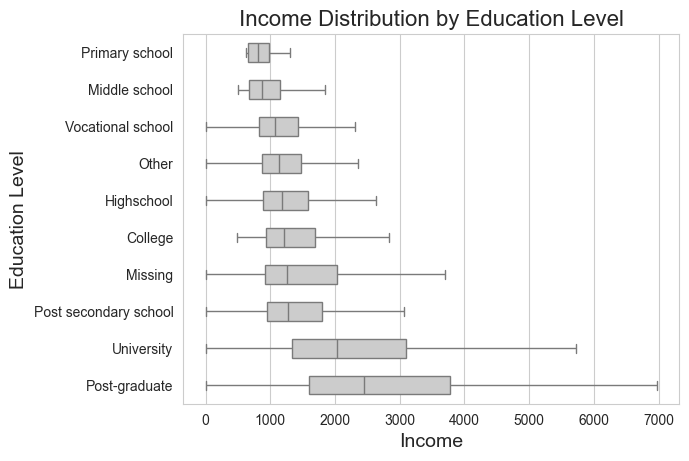

In [29]:
order_by_median = df.groupby("EDUCATION")["INCOME"].median().sort_values().index

sns.boxplot(y="EDUCATION", x="INCOME", data=df, width=0.5, showfliers=False, order=order_by_median, palette=sns.color_palette("blend:#CCCC,#CCCC"))

plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Education Level', fontsize=14)

plt.show()

Insights:
* Post-graduates and University graduates have higher level of income
* Primary and Middle school graduates are on the lower end of the spectrum
* The rest is very similar regarding income

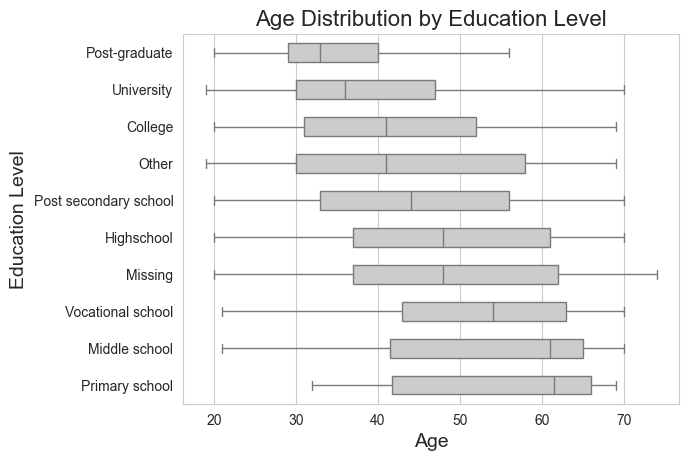

In [30]:
order_by_median = df.groupby("EDUCATION")["AGE"].median().sort_values().index

sns.boxplot(y="EDUCATION", x="AGE", data=df, width=0.5, showfliers=False, order=order_by_median, palette=sns.color_palette("blend:#CCCC,#CCCC"))

plt.title('Age Distribution by Education Level', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Education Level', fontsize=14)

plt.show()

**Insights:** The higher someones Age is, the probability of having a lower educational level, is higher.

<Figure size 800x640 with 0 Axes>

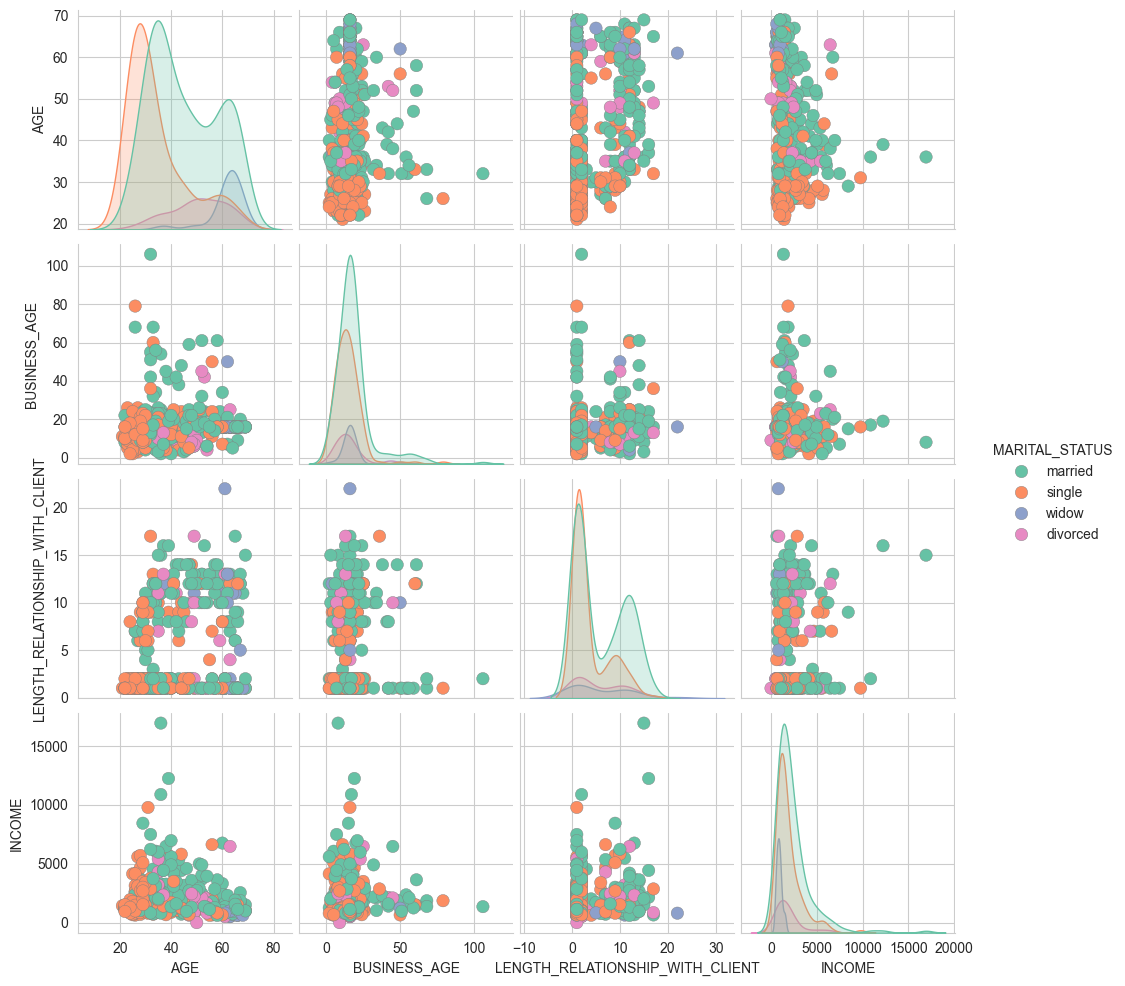

In [31]:
selected_columns = [
    "AGE",
    "MARITAL_STATUS",
    "BUSINESS_AGE",
    "LENGTH_RELATIONSHIP_WITH_CLIENT",
    "INCOME",
]
subset_df = df[selected_columns].sample(frac=0.025, random_state=42)


plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(
    subset_df,
    kind="scatter",
    hue="MARITAL_STATUS",
    plot_kws=dict(s=80, edgecolor="gray", linewidth=0.3),
    palette="Set2",
)
plt.show()

Here there are no groups visible within these features, except the relation between age and marital status that we covered before

Now let's investigate the top 3 Education categories with the same pairplot

<Figure size 6000x6000 with 0 Axes>

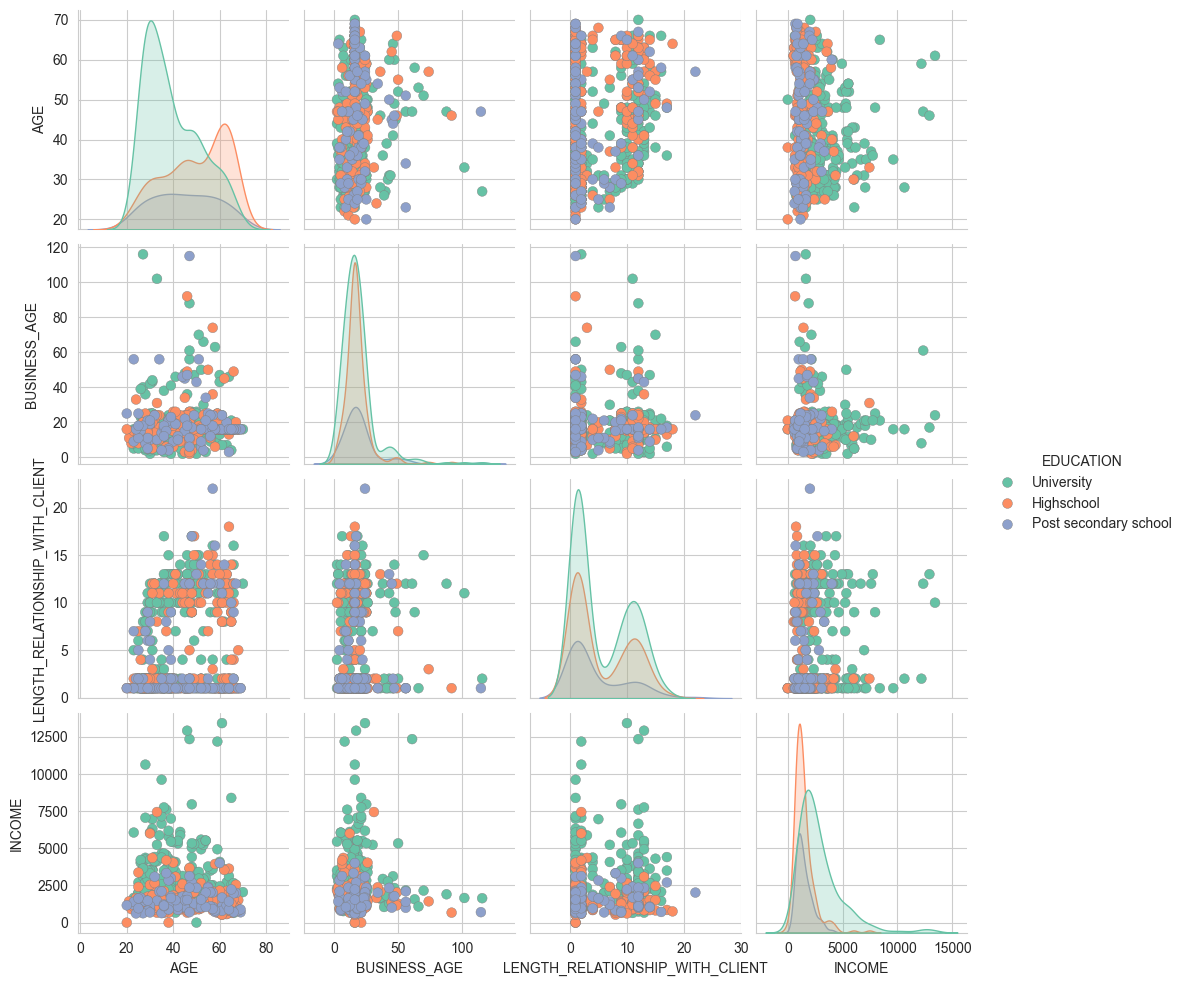

In [32]:
selected_columns = [
    "AGE",
    "EDUCATION",
    "BUSINESS_AGE",
    "LENGTH_RELATIONSHIP_WITH_CLIENT",
    "INCOME",
]
selected_education_categories = ["University","Highschool", "Post secondary school"]
balanced_subset_df = pd.DataFrame(columns=selected_columns)
for category in selected_education_categories:
    category_subset = df[df['EDUCATION'] == category][selected_columns].sample(frac=0.05, random_state=42)
    balanced_subset_df = pd.concat([balanced_subset_df, category_subset])

plt.figure(figsize=(20, 20), dpi=300)
sns.pairplot(
    balanced_subset_df,
    kind="scatter",
    hue="EDUCATION",
    plot_kws=dict(s=50, edgecolor="gray", linewidth=0.3), 
    palette="Set2",
)
plt.show()

Not much more to add than what we did before

<Figure size 800x640 with 0 Axes>

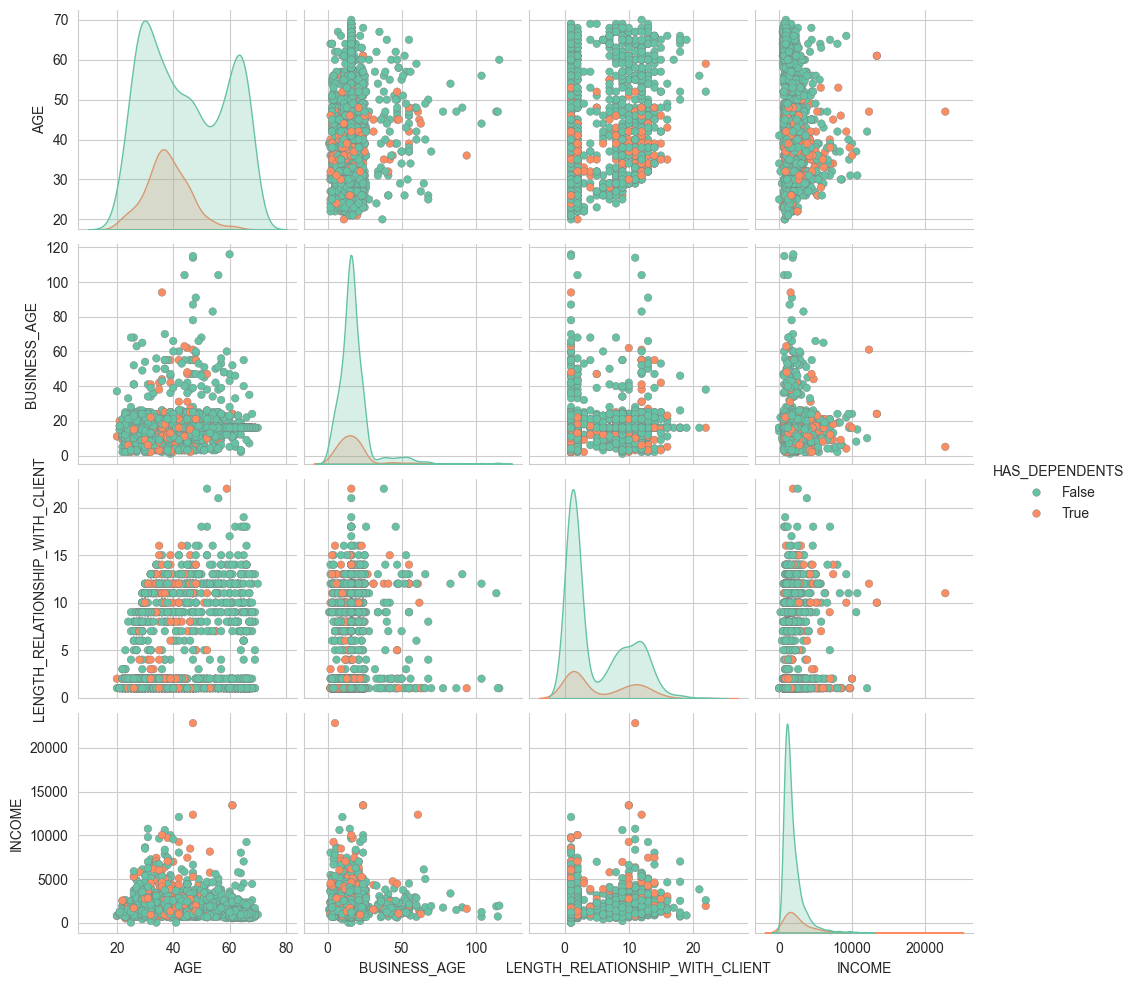

In [33]:
selected_columns = [
    "AGE",
    "HAS_DEPENDENTS",
    "BUSINESS_AGE",
    "LENGTH_RELATIONSHIP_WITH_CLIENT",
    "INCOME",
]
subset_df = df[selected_columns].sample(frac=0.1, random_state=1)


plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(
    subset_df,
    kind="scatter",
    hue="HAS_DEPENDENTS",
    plot_kws=dict(s=30, edgecolor="gray", linewidth=0.3),
    palette="Set2",
)
plt.show()

Here we can see a higher concentration of green points. This is caused by the fact that if we look at the density for age young and old people have fewer dependants.

<Figure size 6000x6000 with 0 Axes>

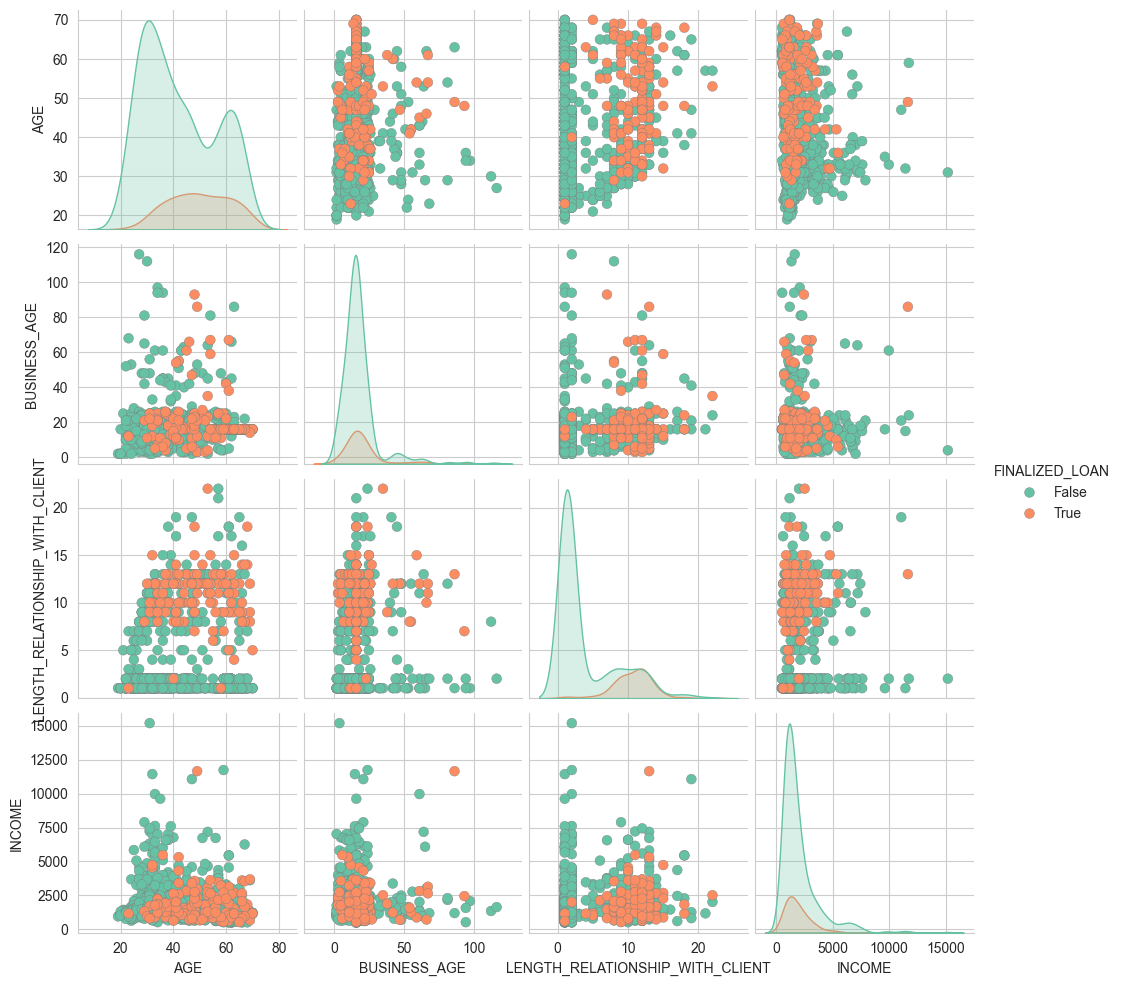

In [34]:
selected_columns = [
    "AGE",
    "FINALIZED_LOAN",
    "BUSINESS_AGE",
    "LENGTH_RELATIONSHIP_WITH_CLIENT",
    "INCOME",
]
selected_education_categories = [False,True]
balanced_subset_df = pd.DataFrame(columns=selected_columns)
for category in selected_education_categories:
    category_subset = df[df['FINALIZED_LOAN'] == category][selected_columns].sample(frac=0.05, random_state=42)
    balanced_subset_df = pd.concat([balanced_subset_df, category_subset])

plt.figure(figsize=(20, 20), dpi=300)
sns.pairplot(
    balanced_subset_df,
    kind="scatter",
    hue="FINALIZED_LOAN",
    plot_kws=dict(s=50, edgecolor="gray", linewidth=0.3), 
    palette="Set2",
)
plt.show()

* There are some groups forming when we look at Age vs income. There is less orange in the area of young people.
* The similar theing we can see but also with the length of relationship with the client.

# Handling Missing Values, Encoding categorical variables, Handling outliers

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


# well keep relation between each education levels
class EducationEncoder(BaseEstimator, TransformerMixin):
    education_map = [
        "Primary school",
        "Middle school",
        "Highschool",
        "Other",
        "Post secondary school",
        "Vocational school",
        "College",
        "University",
        "Post-graduate",
    ]

    def fit(self, X, y=None):
        return self

    def set_output(self, *args, **kwargs):
        return self

    def transform(self, X):
        return X.map(lambda x: EducationEncoder.education_map.index(x) / len(EducationEncoder.education_map)).astype(
            np.float64
        )

# using iqr
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1

        self.r = q3 + 1.5 * iqr
        self.l = q1 - 1.5 * iqr
        return self

    def transform(self, X):
        cols = X.columns
        X_ = X.copy()

        X_ = X_.mask(X_ > self.r, self.r, axis=1)
        X_ = X_.mask(X_ < self.l, self.l, axis=1)
        return pd.DataFrame(X_, columns=cols)

    def set_output(self, *args, **kwargs):
        return self

# chence here there are many missing values we'll try to predict
# them based on all numerical data we'll have so far
class EconomicSectorEncoderImputer(BaseEstimator, TransformerMixin):
    estimator = RandomForestClassifier(
        max_depth=5, random_state=42, n_jobs=-1, min_samples_split=10, n_estimators=300
    )
    encoder = make_pipeline(OneHotEncoder(sparse_output=False)).set_output(
        transform="pandas"
    )

    def fit(self, X, y=None):
        train_idx = np.where(X["ECONOMIC_SECTOR"] != "Missing")[0]
        X_train = X.select_dtypes(include="number").loc[train_idx, :]
        y_train = X.loc[train_idx, "ECONOMIC_SECTOR"]
        EconomicSectorEncoderImputer.estimator.fit(X_train, y_train)
        EconomicSectorEncoderImputer.encoder.fit(y_train.to_frame())

        return self

    def transform(self, X):
        X = X.copy()

        pred_idx = np.where(X["ECONOMIC_SECTOR"] == "Missing")[0]
        X_pred = X.select_dtypes(include="number").loc[pred_idx, :]
        X.loc[pred_idx, "ECONOMIC_SECTOR"] = (
            EconomicSectorEncoderImputer.estimator.predict(X_pred)
        )

        encoded = EconomicSectorEncoderImputer.encoder.transform(
            X["ECONOMIC_SECTOR"].to_frame()
        )
        X.drop("ECONOMIC_SECTOR", axis=1, inplace=True)

        return pd.concat([X, encoded], axis=1)

    def set_output(self, *args, **kwargs):
        return self


# we'll assume that relation between employee numbers is relevant 
# and map it as half of possible numbers where 2000 indicates the highest one
class EmployeeNoEncoderImputer(BaseEstimator, TransformerMixin):
    employee_no_map = {
        "> 1.000": 2000,
        "between 0-10": 5,
        "between 101-250": 175,
        "between 11-20": 15,
        "between 21-50": 35,
        "between 251-500": 375,
        "between 501-1.000": 750,
        "between 51-100": 75,
    }

    estimator = RandomForestClassifier(
        max_depth=5, random_state=42, n_jobs=-1, min_samples_split=10, n_estimators=300
    )

    def fit(self, X, y=None):
        train_idx = np.where(X["EMPLOYEE_NO"] != "Missing")[0]
        X_train = X.select_dtypes(include="number").loc[train_idx, :]
        y_train = X.loc[train_idx, "EMPLOYEE_NO"]
        EmployeeNoEncoderImputer.estimator.fit(X_train, y_train)

        return self

    def transform(self, X):
        X = X.copy()

        pred_idx = np.where(X["EMPLOYEE_NO"] == "Missing")[0]
        X_pred = X.select_dtypes(include="number").loc[pred_idx, :]
        X.loc[pred_idx, "EMPLOYEE_NO"] = self.estimator.predict(X_pred)

        X["EMPLOYEE_NO"] = X["EMPLOYEE_NO"].map(
            lambda x: (EmployeeNoEncoderImputer.employee_no_map[x] - 5) / (2000 - 5)
        )

        return X

    def set_output(self, *args, **kwargs):
        return self


# as previously we'll map it to boolean variable
def create_has_dependents(X):
    return (
        X["HAS_DEPENDENTS"]
        .apply(lambda x: False if x == 0 else True)
        .astype(np.float64)
        .to_frame()
    )




class RenameColumn(BaseEstimator, TransformerMixin):
    def __init__(self, old_column_name, new_column_name):
        self.old_column_name = old_column_name
        self.new_column_name = new_column_name

    def transform(self, X):
        X.rename(columns={self.old_column_name: self.new_column_name}, inplace=True)
        return X

    def fit(self, X, y=None):
        return self
    
    def set_output(self, *args, **kwargs):
        return self


In [38]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# EDUCATION has some missing values but not many
# we'll fill them with most frequent one than encode it with our custom encoder
education_pipeline = Pipeline(
    [
        (
            "imputer",
            SimpleImputer(
                strategy="most_frequent",
                missing_values="Missing",
            ),
        ),
        ("encoder", EducationEncoder()),
    ]
)

# ARE has some missing values but not many
# we'll fill them with most frequent one than encode it with OneHotEncoder
area_pipeline = Pipeline(
    [
        (
            "imputer",
            SimpleImputer(
                strategy="most_frequent",
                missing_values="Missing",
            ),
        ),
        ("encoder", OneHotEncoder(sparse_output=False)),
    ]
)

cat_ct = ColumnTransformer(
    [
        # drop unnecessary columns
        (
            "drop",
            "drop",
            ["SAVING_ACCOUNT", "FOREIGN_ACCOUNT", "DEPOSIT", "PENSION_FUNDS", "DEFAULT_FLAG"],
        ),
        ("education", education_pipeline, ["EDUCATION"]),
        ("area", area_pipeline, ["AREA"]),
        # convert NO_OF_DEPENDENTS to HAS_DEPENDENTS categorical boolean variable
        (
            "create_has_dependents",
            FunctionTransformer(create_has_dependents),
            ["HAS_DEPENDENTS"],
        ),
        # encode with OneHotEncoder
        (
            "one_hot",
            OneHotEncoder(sparse_output=False),
            [
                "PRODUCT",
                "RESIDENTIAL_PLACE",
                "MARITAL_STATUS"
            ],
        ),
    ],
    remainder="passthrough",
).set_output(transform="pandas")

# rename the column with wrong format
rename_ct = ColumnTransformer(
    [("rename_column", RenameColumn("BUSINESS AGE", "BUSINESS_AGE"), ["BUSINESS AGE"]),
     ("rename_column2", RenameColumn("NO_OF_DEPENDENTS", "HAS_DEPENDENTS"), ["NO_OF_DEPENDENTS"])],
    remainder="passthrough",
).set_output(transform="pandas")

# remove outliers using iqr method
num_ct = ColumnTransformer(
    [
        (
            "outliers",
            RemoveOutliers(),
            [
                "AGE",
                "HOUSEHOLD_MEMBERS",
                "INCOME",
                "WORK_SENIORITY",
                "BUSINESS_AGE",
                "LENGTH_RELATIONSHIP_WITH_CLIENT",
            ],
        )
    ],
    remainder="passthrough",
).set_output(transform="pandas")

# we apply it only to left-skewed numerical columns
log_scaler = ColumnTransformer(
    [
        (
            "log_scaler",
            FunctionTransformer(np.log1p),
            [
                "INCOME",
                "WORK_SENIORITY",
                "BUSINESS_AGE",
                "LENGTH_RELATIONSHIP_WITH_CLIENT",
            ],
        ),
    ],
    remainder="passthrough",
).set_output(transform="pandas")

# scale numerical columns
numeric_scaler = ColumnTransformer(
    [
        (
            "numeric_scaler",
            StandardScaler(),
            [
                "INCOME",
                "WORK_SENIORITY",
                "BUSINESS_AGE",
                "LENGTH_RELATIONSHIP_WITH_CLIENT",
                "AGE",
            ],
        )
    ],
    remainder="passthrough",
).set_output(transform="pandas")

employee_pipeline = make_pipeline(EmployeeNoEncoderImputer()).set_output(
    transform="pandas"
)
economic_pipeline = make_pipeline(EconomicSectorEncoderImputer()).set_output(
    transform="pandas"
)


# utility function to keep all column names proper and easily process all data
class MyTransformer(BaseEstimator, TransformerMixin):
    transformers = (
        rename_ct,
        num_ct,
        cat_ct,
        log_scaler,
        numeric_scaler,
        employee_pipeline,
        economic_pipeline,
    )

    def fit(self, X, y=None):
        for transformer in MyTransformer.transformers:
            X = transformer.fit_transform(X)
            MyTransformer.reset_columns(X)
        return self

    def transform(self, X):
        for transformer in MyTransformer.transformers:
            X = transformer.transform(X)
            MyTransformer.reset_columns(X)
        return X

    @staticmethod
    def reset_columns(X):
        X.columns = [col.split("__")[-1] for col in X.columns]

In [39]:
df = pd.read_csv("../data/orig_train.csv")
processing_pipeline = MyTransformer()
df = processing_pipeline.fit_transform(df)

# Saving results

In [40]:
df.to_csv("../data/X_train.csv", index=False)

In [43]:
import joblib

joblib.dump(processing_pipeline, '../pipelines/processing_pipeline.joblib')

['../pipelines/processing_pipeline.joblib']